In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df0910 = pd.read_excel('Documents\\data0910.xlsx')
df1011 = pd.read_excel('Documents\\data1011.xlsx')


# Data Preparation

In [54]:
df = pd.concat([df0910,df1011])
print(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [61]:
df.shape

(1067371, 8)

In [63]:
null1011 = df1011.isnull().sum()

In [67]:
null1011per = (null1011*100)/len(df1011)

In [161]:
print(null1011per)

Invoice         0.000000
StockCode       0.000000
Description     0.268310
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    24.926648
Country         0.000000
dtype: float64


In [70]:
df.count()

Invoice        1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

In [72]:
df.duplicated().sum()

34335

In [87]:
# Invoice column has come values which are cancelled, so lets calculate canceled invoices
df['Invoice'] = df['Invoice'].astype(str)
invoices_starting_with_C = df[df['Invoice'].str.startswith('C')]
invoices_starting_with_C.describe()



,Quantity,Price,Customer ID
count,19494.000000,19494.000000,18744.000000
mean,-25.186827,44.872221,15014.418694
std,805.104908,596.335291,1698.413277
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13552.000000
50%,-2.000000,2.950000,14911.000000
75%,-1.000000,6.750000,16401.000000
max,1.000000,38970.000000,18287.000000


In [92]:
#here maximum canceled invoices has quantity in negative so we should drop these canceles invoice values in the 'Invoice' column.

df_valid_invoices = df[~df['Invoice'].str.startswith('C', na=False)]

In [90]:
# df_valid_invoices is stored in df1
df1 = df_valid_invoices 

In [91]:

print(df1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [93]:
#Finding null values

nullvalues = df1.isnull().sum()

In [94]:
# Converting null values into percentage
nullper = (nullvalues*100)/len(df1)
print(nullper)

Invoice         0.000000
StockCode       0.000000
Description     0.418179
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    23.118839
Country         0.000000
dtype: float64

Here "Description" column has 0.42% nullvalues and  "Customer ID" has 23% null values. We should drop null values in Here "Description" column but we can replace nulls values in "Customer ID" with any other values. But for now, we are dropping all null values.  

In [ ]:
# Drop rows with null values in the 'Description' and 'Customer ID' columns

df2 = df1.dropna(subset=['Description', 'Customer ID'])

In [97]:
df2.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# Customer Segmentation: 

In [98]:
#Customer Segmentation: 

"""RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. 
These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value 
affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

"""


# Convert 'InvoiceDate' to datetime
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary Value
snapshot_date = df2['InvoiceDate'].max() + pd.DateOffset(1)  # Snapshot date for calculating recency
rfm_data = df2.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency: days since last purchase
    'Invoice': 'nunique',  # Frequency: number of unique invoices
    'Price': 'sum'  # Monetary Value: total purchase amount
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Price': 'Monetary'
})

# Display the RFM data
print(rfm_data.head())

# Perform RFM segmentation
# Define quantiles for each RFM metric
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])

# Define function to segment customers
def rfm_segment(row):
    r_score = 4 if row['Recency'] <= quantiles.loc[0.25, 'Recency'] else (
        3 if row['Recency'] <= quantiles.loc[0.5, 'Recency'] else (
            2 if row['Recency'] <= quantiles.loc[0.75, 'Recency'] else 1
        )
    )
    f_score = 4 if row['Frequency'] >= quantiles.loc[0.75, 'Frequency'] else (
        3 if row['Frequency'] >= quantiles.loc[0.5, 'Frequency'] else (
            2 if row['Frequency'] >= quantiles.loc[0.25, 'Frequency'] else 1
        )
    )
    m_score = 4 if row['Monetary'] >= quantiles.loc[0.75, 'Monetary'] else (
        3 if row['Monetary'] >= quantiles.loc[0.5, 'Monetary'] else (
            2 if row['Monetary'] >= quantiles.loc[0.25, 'Monetary'] else 1
        )
    )
    return str(r_score) + str(f_score) + str(m_score)

# Apply segmentation function to create RFM segments
rfm_data['RFM_Segment'] = rfm_data.apply(rfm_segment, axis=1)

# Display RFM segments
print(rfm_data['RFM_Segment'].value_counts())




C:\Users\Admin\AppData\Local\Temp\ipykernel_4800\4118626139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])


             Recency  Frequency  Monetary
Customer ID                              
12346.0          326         12    207.40
12347.0            2          8    644.16
12348.0           75          5    193.10
12349.0           19          4   1480.44
12350.0          310          1     65.30
444    635
121    621
122    411
344    325
221    323
233    271
222    246
333    231
433    214
321    213
322    165
232    149
332    145
244    125
443    123
123    117
421    110
334    109
343    106
223    104
133     99
432     98
422     96
434     96
132     83
234     80
323     76
243     68
231     64
423     47
431     43
134     38
331     36
131     34
442     28
342     26
144     22
242     20
124     15
143     14
224     11
441     11
424     10
341      6
241      5
324      5
142      4
141      3
Name: RFM_Segment, dtype: int64


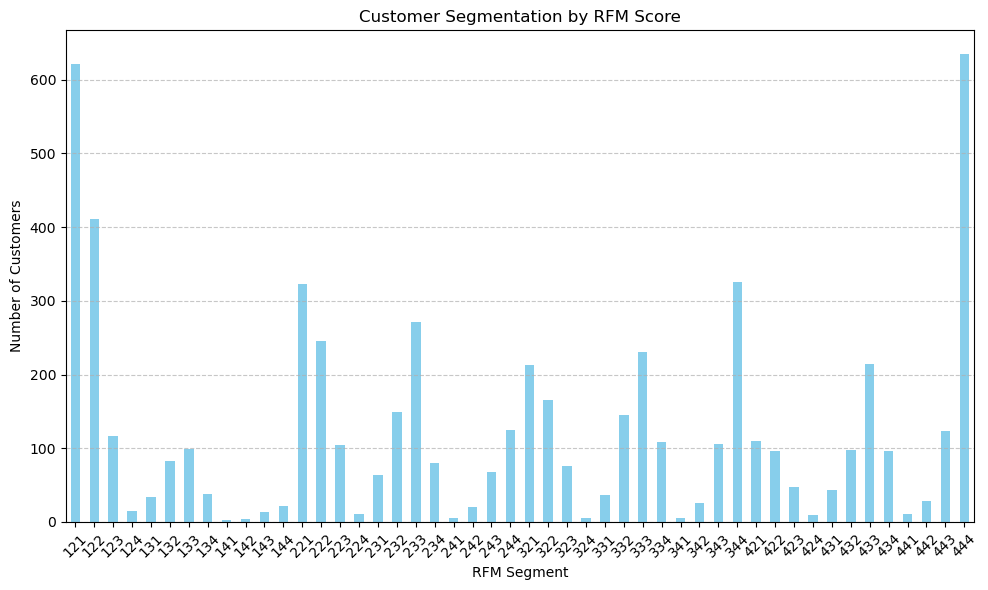

In [99]:
import matplotlib.pyplot as plt

# Assuming 'rfm_data' DataFrame contains RFM segments in 'RFM_Segment' column

# Count the number of customers in each RFM segment
segment_counts = rfm_data['RFM_Segment'].value_counts()

# Sort segments based on their value counts
segment_counts_sorted = segment_counts.sort_index()

# Plotting
plt.figure(figsize=(10, 6))
segment_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by RFM Score')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


"""R: Recency is divided into 4 segments, with 4 representing the highest recency (i.e., customers who made a purchase most 
recently) and 1 representing the lowest recency (i.e., customers who made a purchase least recently).

F: Frequency is divided into 4 segments, with 4 representing the highest frequency (i.e., customers who make purchases most 
frequently) and 1 representing the lowest frequency (i.e., customers who make purchases least frequently).

M: Monetary value is divided into 4 segments, with 4 representing the highest monetary value 
(i.e., customers who spend the most) and 1 representing the lowest monetary value (i.e., customers who spend the least)."""

# Seasonal Trends

In [ ]:
# Seasonal Trends


# Convert 'InvoiceDate' to datetime
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df2['YearMonth'] = df2['InvoiceDate'].dt.to_period('M')

# Group by month and calculate total sales revenue
monthly_sales = df2.groupby('YearMonth')['Price'].sum()


In [160]:
print(monthly_sales)

YearMonth
2009-12     98310.490
2010-01     84958.372
2010-02     74726.446
2010-03    125453.741
2010-04     87965.712
2010-05     91810.500
2010-06    101125.050
2010-07     90292.920
2010-08     82668.910
2010-09    116536.811
2010-10    161476.400
2010-11    182645.462
2010-12    126988.580
2011-01     66964.990
2011-02     63185.760
2011-03     88563.100
2011-04     79005.481
2011-05    102128.280
2011-06     85274.730
2011-07     75919.901
2011-08     79423.830
2011-09    119053.062
2011-10    165849.980
2011-11    185522.460
2011-12     47191.430
Freq: M, Name: Price, dtype: float64

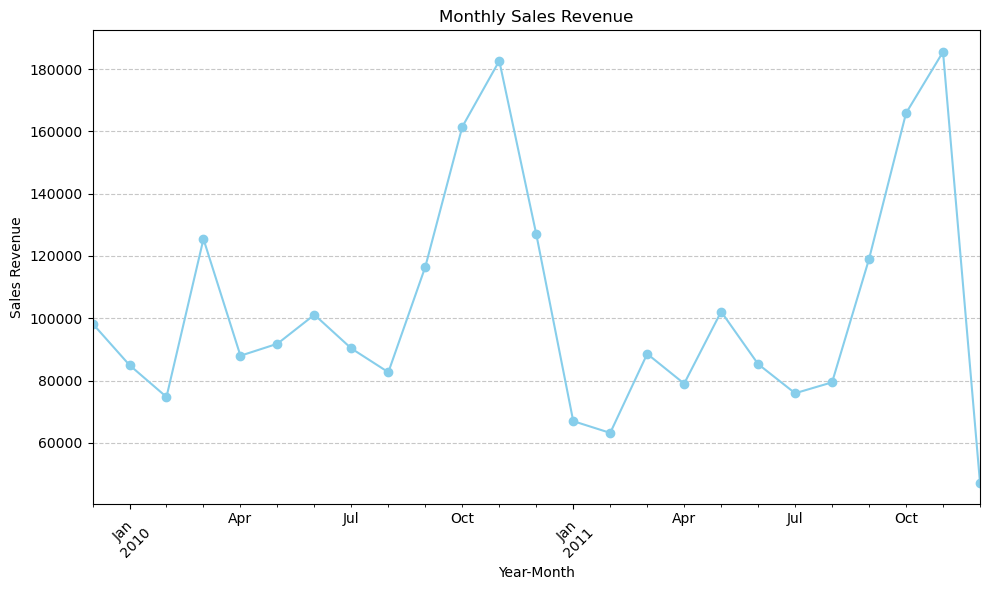

In [156]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='skyblue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Year-Month')
plt.ylabel('Sales Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Customer Life Time Value (CLV)

In [107]:
# Calculating customer life time value (CLV)
"""Calculating Customer Lifetime Value (CLV) involves estimating the total revenue a customer will
   generate over their entire relationship with a business. """


# Step 1: Calculate Revenue per Customer
revenue_per_customer = df2.groupby('Customer ID')['Price'].sum()

# Step 2: Calculate Average Purchase Frequency
purchase_frequency = df2.groupby('Customer ID')['InvoiceDate'].nunique().mean()

# Step 3: Calculate Average Customer Lifespan
# Here we have used the difference between the earliest and latest dates in the dataset as an approximation
earliest_date = df2['InvoiceDate'].min()
latest_date = df2['InvoiceDate'].max()
average_lifespan = (latest_date - earliest_date).days / 30  # Convert to months

# Step 4: Calculate Average Revenue per Purchase
average_revenue_per_purchase = df2['Price'].mean()

# Step 5: Calculate CLV
clv = average_revenue_per_purchase * purchase_frequency * average_lifespan

print("Customer Lifetime Value (CLV):", clv)




Customer Lifetime Value (CLV): 494.3166121860441


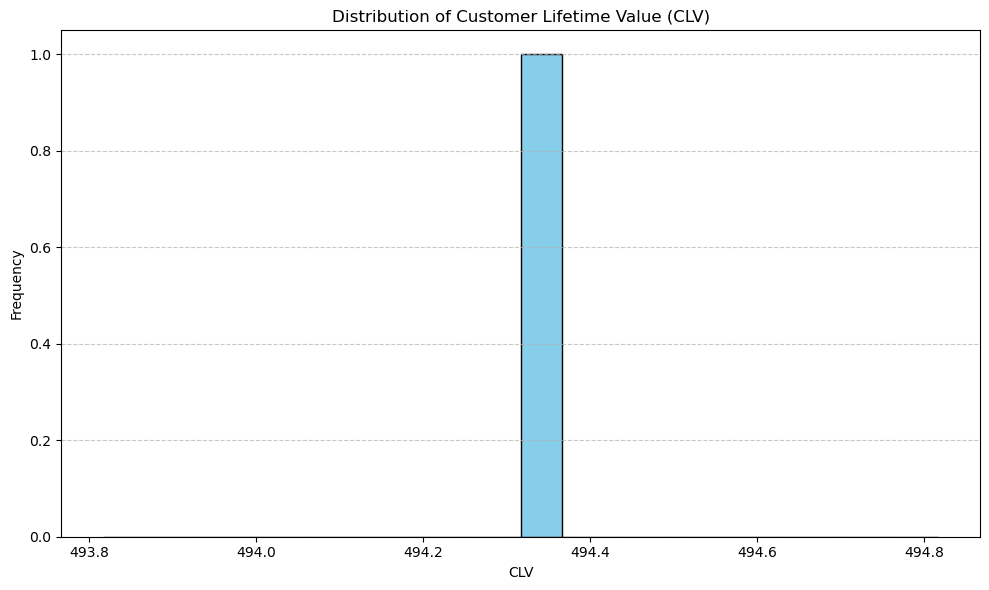

In [110]:
# Plotting CLV distribution
plt.figure(figsize=(10, 6))
plt.hist(clv, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Customers Journey over the time

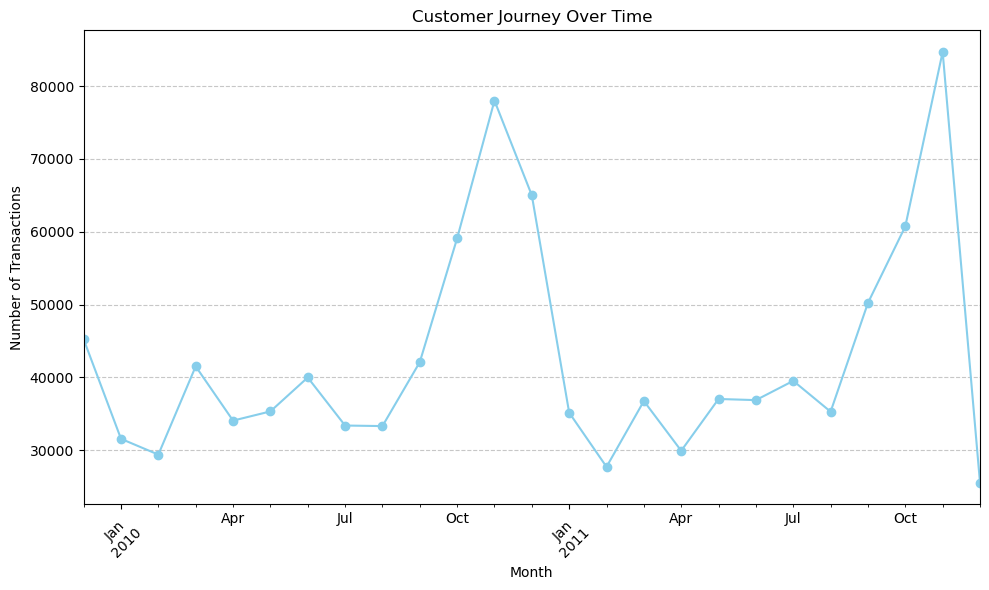

In [134]:
#Customers Journey over the time



# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create monthly intervals
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group data by month and count the number of transactions
monthly_activity = df.groupby('Month').size()

# Plot customer journey over time
plt.figure(figsize=(10, 6))
monthly_activity.plot(marker='o', color='skyblue')
plt.title('Customer Journey Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()






# Geographical Analysis

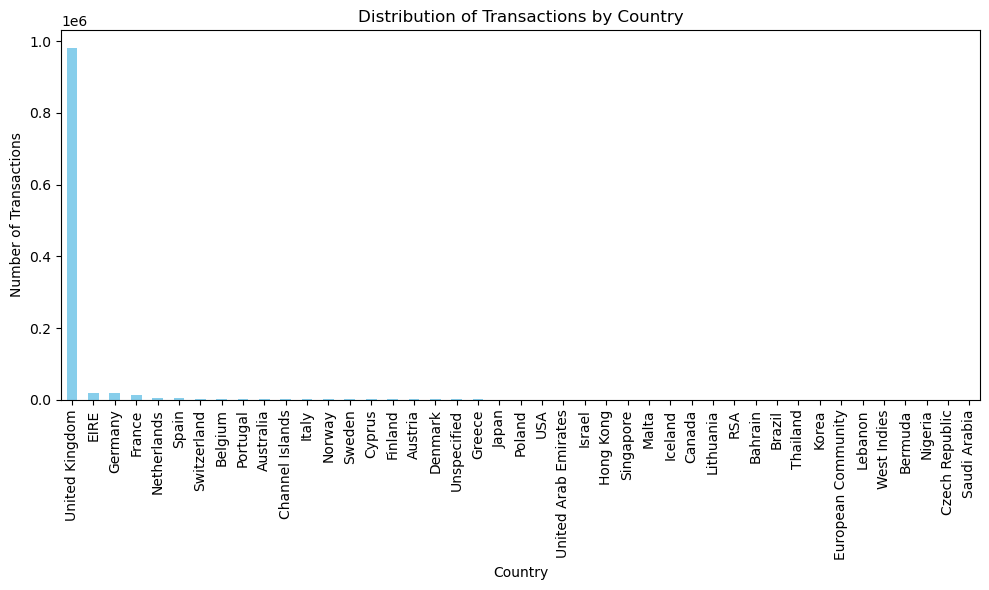

In [138]:
# Geographical Analysis 


# Group transactions by country and count the number of transactions in each country
country_counts = df['Country'].value_counts()

# Plot the distribution of transactions by country
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Product Performance Analysis

In [140]:
# Product Performance Analysis



# Calculate total quantity sold for each product
product_sales_volume = df2.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
product_sales_volume = product_sales_volume.rename(columns={'Quantity': 'TotalQuantitySold'})

# Calculate total revenue generated for each product
product_revenue = df2.groupby(['StockCode', 'Description'])['Price'].sum().reset_index()
product_revenue = product_revenue.rename(columns={'Price': 'TotalRevenue'})

# Merge sales volume and revenue data
product_performance = pd.merge(product_sales_volume, product_revenue, on=['StockCode', 'Description'])

# Calculate profitability (revenue - cost) for each product
# Assuming cost is not explicitly available and profit is calculated based on revenue only
product_performance['Profit'] = product_performance['TotalRevenue']

# Display the product performance metrics
print(product_performance.head())


  StockCode                  Description  TotalQuantitySold  TotalRevenue  \
0     10002  INFLATABLE POLITICAL GLOBE                8624        266.72   
1     10080     GROOVY CACTUS INFLATABLE                303         13.75   
2     10109         BENDY COLOUR PENCILS                  4          0.42   
3     10120                 DOGGY RUBBER                664         13.86   
4     10125      MINI FUNKY DESIGN TAPES               2016        108.75   

   Profit  
0  266.72  
1   13.75  
2    0.42  
3   13.86  
4  108.75  


C:\Users\Admin\AppData\Local\Temp\ipykernel_4800\1013167410.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_revenue = df2.groupby(['StockCode', 'Description'])['Quantity', 'Price'].agg({'Quantity': 'sum', 'Price': 'sum'}).reset_index()


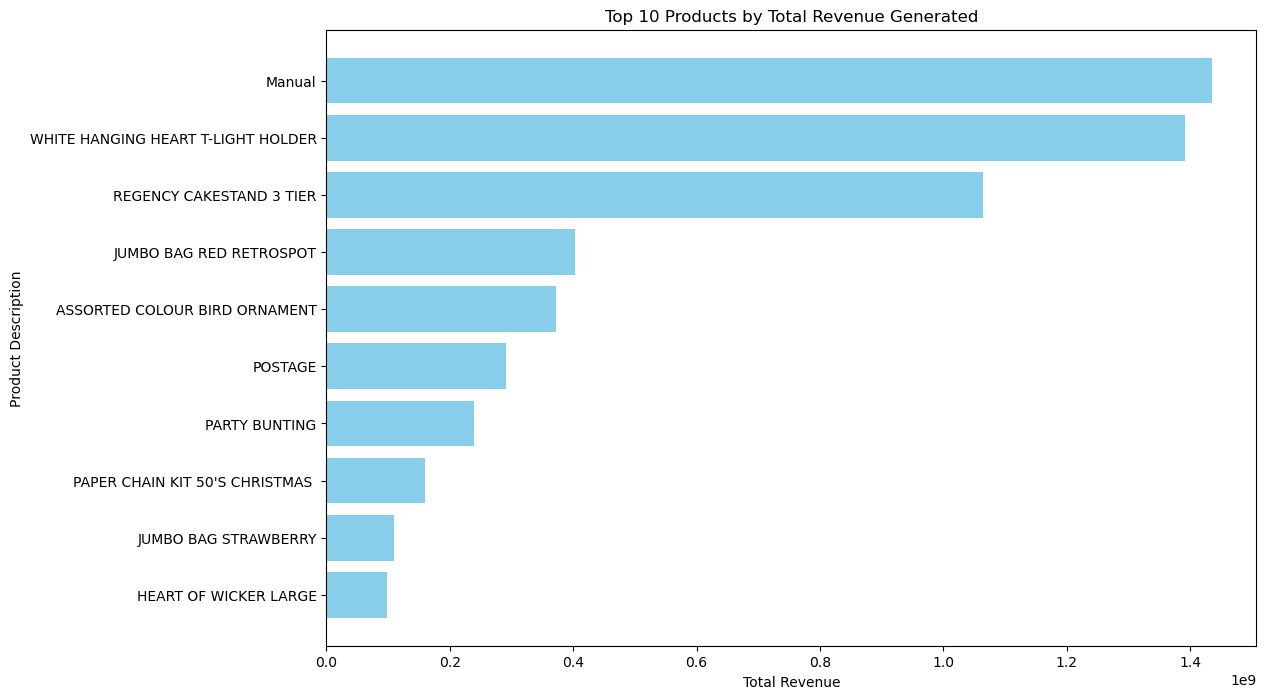

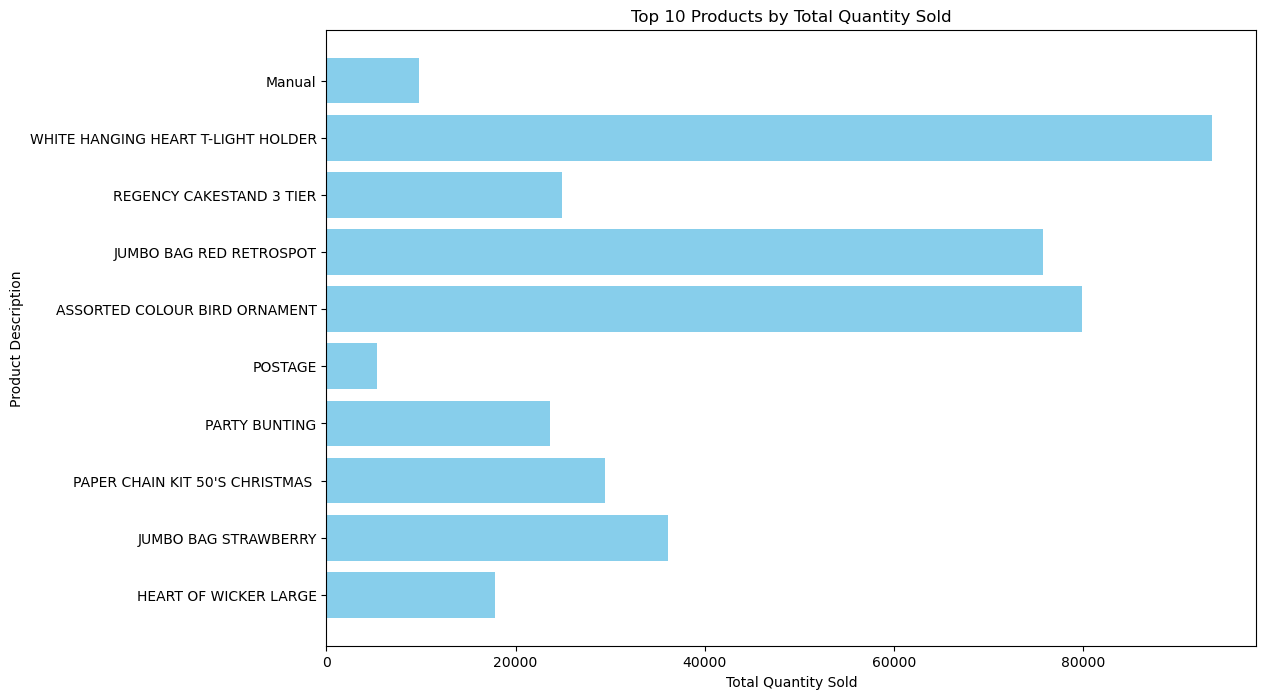

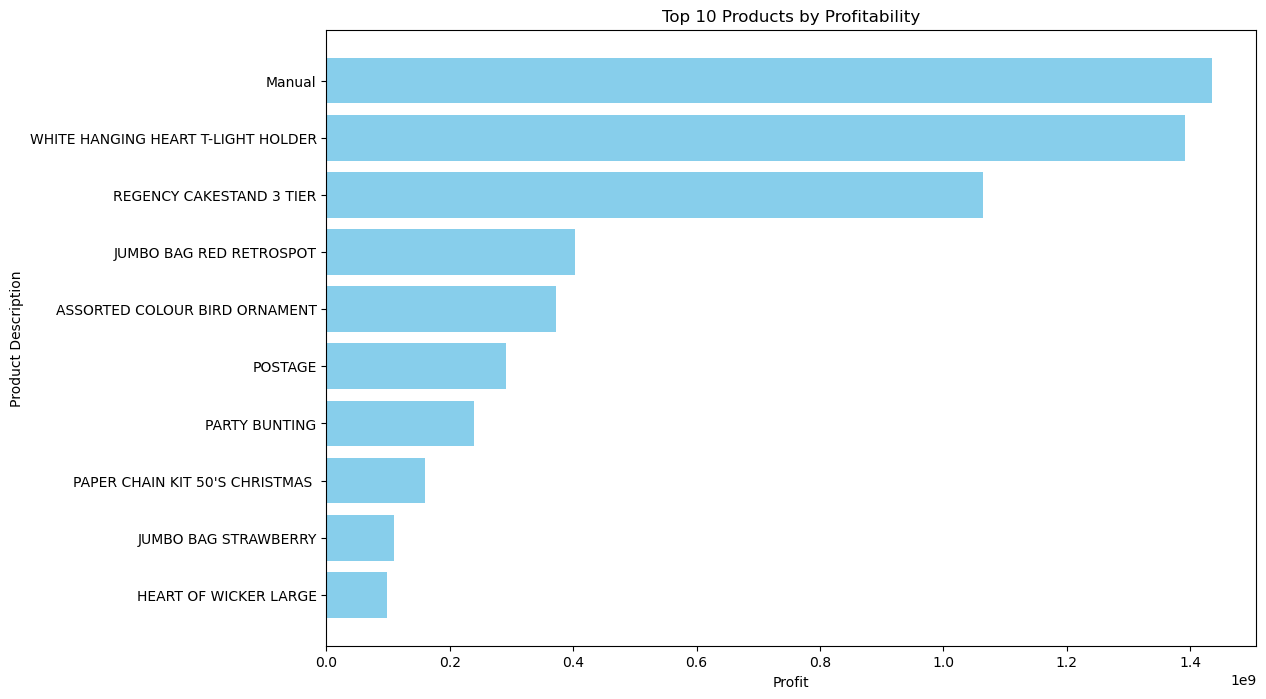

In [142]:


# Calculate total revenue generated for each product
product_revenue = df2.groupby(['StockCode', 'Description'])['Quantity', 'Price'].agg({'Quantity': 'sum', 'Price': 'sum'}).reset_index()
product_revenue['TotalRevenue'] = product_revenue['Quantity'] * product_revenue['Price']

# Calculate profitability for each product
# Assuming cost is not explicitly available and profit is calculated based on revenue only
product_revenue['Profit'] = product_revenue['TotalRevenue']

# Sort products by total revenue generated
product_revenue_sorted = product_revenue.sort_values(by='TotalRevenue', ascending=False)

# Plot top N products by total revenue generated
top_n = 10  # Change this value to visualize more or fewer products
plt.figure(figsize=(12, 8))
plt.barh(product_revenue_sorted['Description'].head(top_n), product_revenue_sorted['TotalRevenue'].head(top_n), color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top {} Products by Total Revenue Generated'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show top products at the top
plt.show()

# Plot total quantity sold for top N products
plt.figure(figsize=(12, 8))
plt.barh(product_revenue_sorted['Description'].head(top_n), product_revenue_sorted['Quantity'].head(top_n), color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top {} Products by Total Quantity Sold'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show top products at the top
plt.show()

# Plot profitability for top N products
plt.figure(figsize=(12, 8))
plt.barh(product_revenue_sorted['Description'].head(top_n), product_revenue_sorted['Profit'].head(top_n), color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Product Description')
plt.title('Top {} Products by Profitability'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show top products at the top
plt.show()


# Customers Purchase Analyzing 

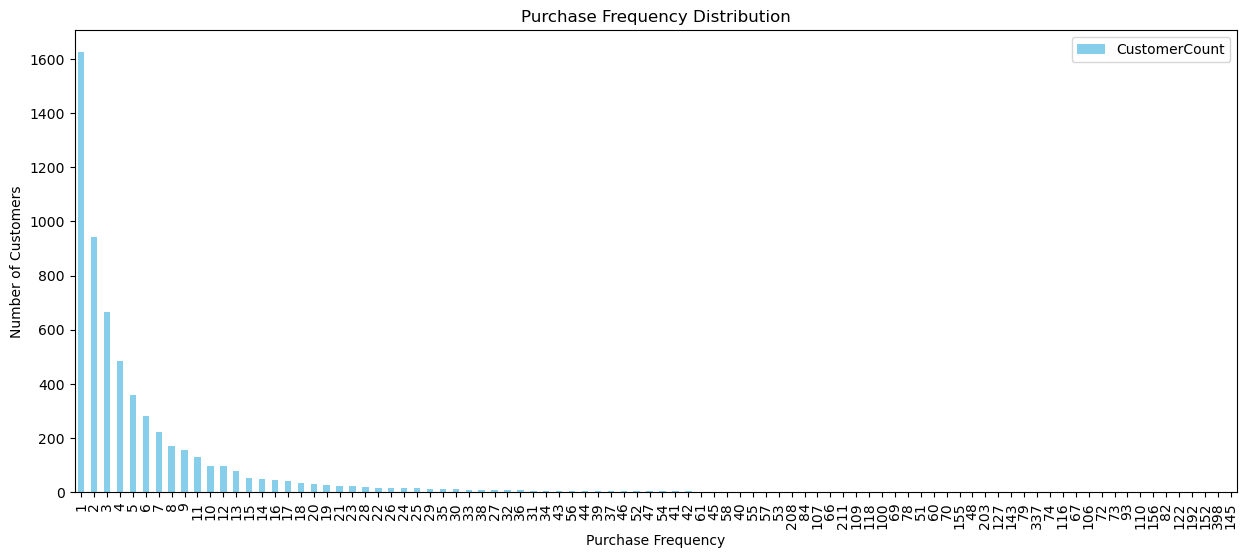

In [151]:
# Customers Purchase Analyzing 


# Step 1: Calculate purchase frequency for each customer
purchase_frequency = df2.groupby('Customer ID')['Invoice'].nunique().reset_index()
purchase_frequency.columns = ['Customer ID', 'PurchaseFrequency']

# Step 2: Identify repeat customers
repeat_customers = purchase_frequency[purchase_frequency['PurchaseFrequency'] > 1]

# Step 3: Analyze cross-category purchases
cross_category_purchases = df2.groupby(['Customer ID', 'StockCode']).size().reset_index()
cross_category_purchases.columns = ['Customer ID', 'StockCode', 'PurchaseCount']

# Step 4: Analyze purchase frequency distribution
purchase_frequency_distribution = purchase_frequency['PurchaseFrequency'].value_counts().reset_index()
purchase_frequency_distribution.columns = ['PurchaseFrequency', 'CustomerCount']

# Step 5: Visualize purchase frequency distribution
purchase_frequency_distribution.plot(kind='bar', x='PurchaseFrequency', y='CustomerCount', color='skyblue', figsize=(15, 6))
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()


# Recommendations:

Here are three concise recommendations for the CEO:

1. Focus on Repeat Customers: Prioritize retaining customers who make multiple purchases by offering personalized incentives and rewards.

2. Promote Cross-Selling: Identify products frequently purchased together and create bundled offers to encourage customers to buy complementary items.

3. Optimize Operations: Use purchase frequency data to manage inventory efficiently and streamline operations to meet customer demand effectively while minimizing costs.

Implementing these strategies can drive customer loyalty, increase sales, and improve operational efficiency for the company.